# EMA adherence

Kendra Wyant  
October 2, 2024

Purpose: This file calculates overall weekly EMA adherence using EMA survey data (`survey_daily.csv`).

## Set up

In [ ]:
#| message: false
#| warning: false
#| code-fold: true

options(conflicts.policy = "depends.ok")
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

### Data

In [ ]:
ema <- read_csv(here::here(path_shared, "survey_daily.csv"),
                show_col_types = FALSE)

monthly <- read_csv(here::here(path_shared, "generic_monthly_wide.csv"),
                show_col_types = FALSE) 

e.g.:
  dat <- vroom(...)
  problems(dat)

burden subids

In [ ]:
burden_subids <- burden_quant |> 
  pull(subid) |>
  unique()

### Disposition

Study start and end dates for each subid

In [ ]:
study_start <- ema |> 
  group_by(subid) |> 
  arrange(start_date) |> 
  slice(1) |> 
  ungroup() |> 
  mutate(study_start = as_date(start_date)) |> 
  select(subid, study_start)

study_end <- ema |> 
  group_by(subid) |> 
  arrange(desc(start_date)) |> 
  slice(1) |> 
  ungroup() |> 
  mutate(study_end = as_date(start_date)) |> 
  select(subid, study_end)

dates <- study_start |> 
  full_join(study_end, by = "subid") |> 
  mutate(study_days = study_end - study_start)

Days on study

336 participants started study/provided at least one month of EMA.

In [ ]:
dates |> 
  skim(study_days) |> 
  yank("difftime")

  --------------------------------------------------------------------------------
  skim_variable     n_missing   complete_rate min     max      median     n_unique
  --------------- ----------- --------------- ------- -------- -------- ----------
  study_days                0               1 31 days 416 days 353 days        157

  --------------------------------------------------------------------------------


For participants who completed burden study:  
Min days on study = 122 days (all participants provided data for at least 4 months)

In [ ]:
dates |> 
  filter(subid %in% burden_subids) |>
  skim(study_days) |> 
  yank("difftime")

  ---------------------------------------------------------------------------------
  skim_variable     n_missing   complete_rate min      max      median     n_unique
  --------------- ----------- --------------- -------- -------- -------- ----------
  study_days                0               1 122 days 416 days 358 days        103

  ---------------------------------------------------------------------------------


Disposition of participants by month

In [ ]:
#| code-fold: true
#|
month_1 <- dates |> 
  filter(study_days >= 30) |> 
  nrow()

month_2 <- dates |> 
  filter(study_days >= 60)  |> 
  nrow()

month_3 <- dates |> 
  filter(study_days >= 90)  |> 
  nrow()

month_4 <- dates |> 
  filter(study_days >= 120)  |> 
  nrow()

month_4_burden <- dates |>
  filter(study_days >= 120)  |> 
  filter(subid %in% burden_subids)  |> 
  nrow()

month_5 <- dates |> 
  filter(study_days >= 150)  |> 
  nrow()

month_6 <- dates |>
  filter(study_days >= 180)  |> 
  nrow()

month_7 <- dates |>
  filter(study_days >= 210)  |> 
  nrow()

month_8 <- dates |>
  filter(study_days >= 240)  |> 
  nrow()

month_9 <- dates |>
  filter(study_days >= 270)  |> 
  nrow()

month_10 <- dates |>
  filter(study_days >= 300)  |> 
  nrow()

month_11 <- dates |>
  filter(study_days >= 330) |> 
  nrow()

month_12 <- dates |>
  filter(study_days >= 360) |> 
  nrow()

**Some participants on study past 4 months but have no burden data**

In [ ]:
#| code-fold: true

DiagrammeR::grViz("
  digraph {
  
  node [fontname = 'Arial', shape = rectangle, fixedsize = true, width = 1.7, height = .6]
  a [label = '@@1']
  b [label = '@@2']
  c [label = '@@3']
  d1 [label = '@@4']
  d2 [label = '@@5', color = crimson]
  e1 [label = '@@6']
  f1 [label = '@@7']
  g1 [label = '@@8']
  h1 [label = '@@9']
  i1 [label = '@@10']
  j1 [label = '@@11']
  k1 [label = '@@12']
  l1 [label = '@@13']
  
  
  {rank = same; d1; d2}
  a -> b
  b -> c
  c -> d1 -> d2
  d1 -> e1 -> f1 -> g1 -> h1 -> i1 -> j1 -> k1 -> l1
  }
  
  [1]: paste('Month 1\\n', 'N = ', month_1)
  [2]: str_c('Month 2\\n', 'N = ', month_2) 
  [3]: str_c('Month 3\\n', 'N = ', month_3)
  [4]: str_c('Month 4\\n', 'N = ', month_4)
  [5]: str_c('Month 4 + Survey\\n', 'N = ', month_4_burden)
  [6]: str_c('Month 5\\n', 'N = ', month_5)
  [7]: str_c('Month 6\\n', 'N = ', month_6)
  [8]: str_c('Month 7\\n', 'N = ', month_7)
  [9]: str_c('Month 8\\n', 'N = ', month_8)
  [10]: str_c('Month 9\\n', 'N = ', month_9)
  [11]: str_c('Month 10\\n', 'N = ', month_10)
  [12]: str_c('Month 11\\n', 'N = ', month_11)
  [13]: str_c('Month 12\\n', 'N = ', month_12)
  ", height = "1000px") 

### Daily Survey Overall Adherence

Get all study days for each subid

In [ ]:
# function to map over
get_study_days <- function(the_subid, dates) {
  study_start <- dates |>  filter(subid == the_subid) |>  pull(study_start)
  study_end <- dates |>  filter(subid == the_subid) |> pull(study_end)
  study_days <- tibble(subid = the_subid, study_day = seq(study_start, study_end - days(1), by = "day")) 
  return(study_days)
}

study_dates <- dates$subid |> 
  map_dfr(~get_study_days(.x, dates))

Count surveys per study day (day starts at 6 am)

In [ ]:
ema_count <- ema |>
  mutate(study_day = if_else(hour(start_date) >= 6, 
                        as_date(start_date),
                        as_date(start_date) - days(1))) |> 
  count(subid, study_day) 


ema_count <- ema_count |> 
  mutate(n = if_else(n > 1, 1, n))

Add counts to study dates

In [ ]:
count_study_dates <- study_dates |> 
  left_join(ema_count, by = c("subid", "study_day")) |> 
  mutate(n = if_else(is.na(n), 0, n)) |> 
  mutate(n_prompts = 1) 

calculate mean adherence

In [ ]:
mean_ema <- count_study_dates |> 
  group_by(subid) |> 
  summarize(n_total = sum(n), prompt_total = sum(n_prompts)) |> 
  mutate(mean = n_total/prompt_total) |> 
  ungroup() |> 
  summarize(mean = mean(mean))

**On average participants (N = 336) completed 0.72 daily surveys each day they were on study. That is their overall adherence for a once daily EMA was 72%.**

Hist of overall adherence by subid

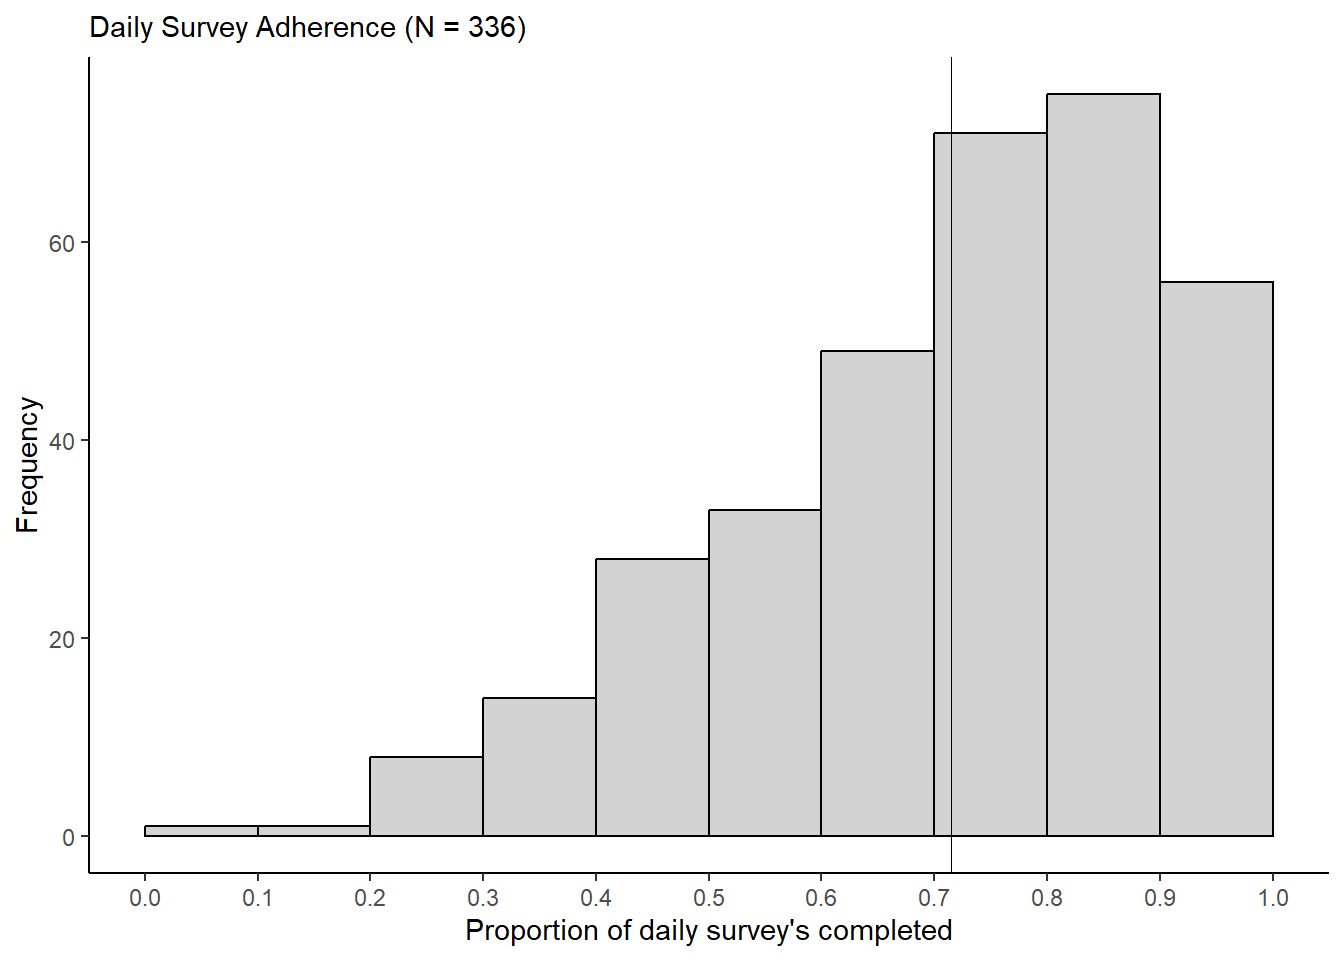

In [ ]:
#| code-fold: true

count_study_dates |> 
  group_by(subid) |> 
  summarise(n_total = sum(n),
            n_prompts = sum(n_prompts)) |> 
  mutate(adherence = n_total/n_prompts) |> 
  ggplot(aes(x = adherence)) +
  geom_histogram(color = "black", fill = "light grey", binwidth = .1, center = .55) +
  scale_x_continuous(breaks = c(0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0)) +
  labs(y = "Frequency", x = "Proportion of daily survey's completed",
       subtitle = "Daily Survey Adherence (N = 336)") +
  geom_vline(aes(xintercept = mean_ema$mean), linewidth = .3) +
  theme_classic()

### Daily Survey Adherence over time

Quite a few people have over 365 days of EMA. *Lose these in adherence over 12 month plot*.

In [ ]:
dates |> 
  mutate(n = study_end - study_start) |> 
  arrange(desc(n)) |> 
  filter(n > 365) |> 
  print(n = Inf)

# A tibble: 70 × 5
   subid study_start study_end  study_days n       
   <dbl> <date>      <date>     <drtn>     <drtn>  
 1  1152 2022-09-06  2023-10-27 416 days   416 days
 2  1200 2022-11-01  2023-12-22 416 days   416 days
 3  1146 2022-08-16  2023-10-03 413 days   413 days
 4  1286 2023-03-01  2024-04-12 408 days   408 days
 5  1211 2022-11-18  2023-12-28 405 days   405 days
 6  1080 2022-05-10  2023-06-18 404 days   404 days
 7  1197 2022-10-31  2023-12-08 403 days   403 days
 8  1269 2023-02-06  2024-03-07 395 days   395 days
 9  1168 2022-10-03  2023-10-31 393 days   393 days
10  1352 2023-06-07  2024-07-02 391 days   391 days
11  1035 2022-03-07  2023-04-01 390 days   390 days
12  1070 2022-04-28  2023-05-22 389 days   389 days
13  1071 2022-04-29  2023-05-23 389 days   389 days
14  1036 2022-03-11  2023-04-03 388 days   388 days
15  1044 2022-03-25  2023-04-17 388 days   388 days
16  1302 2023-03-16  2024-04-07 388 days   388 days
17  1029 2022-02-21  2023-03-15 387 days   38

Slice into 30 day bins

In [ ]:
#| code-fold: true

study_months <- count_study_dates |> 
  group_by(subid) |> 
  slice(1:30) |> 
  mutate(month = 1) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(31:60) |> 
    mutate(month = 2)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(61:90) |> 
    mutate(month = 3)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(91:120) |> 
    mutate(month = 4)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(121:150) |> 
    mutate(month = 5)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(151:180) |> 
    mutate(month = 6)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(181:210) |> 
    mutate(month = 7)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(211:240) |> 
    mutate(month = 8)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(241:270) |> 
    mutate(month = 9)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(271:300) |> 
    mutate(month = 10)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(301:330) |> 
    mutate(month = 11)) |> 
  bind_rows(count_study_dates |> 
    group_by(subid) |> 
    slice(331:360) |> 
    mutate(month = 12)) |> 
  ungroup()

Get individual adherence scores

In [ ]:
ema_month_adherence <- study_months |> 
  group_by(subid, month) |> 
  summarize(sum_n = sum(n), sum_prompts = sum(n_prompts), .groups = "rowwise") |> 
  mutate(adherence = sum_n/sum_prompts) |> 
  ungroup()

Summarize total adherence

In [ ]:
ema_month_adherence |> 
  group_by(month) |> 
  summarize(mean_adherence = mean(adherence)) 

# A tibble: 12 × 2
   month mean_adherence
   <dbl>          <dbl>
 1     1          0.824
 2     2          0.789
 3     3          0.756
 4     4          0.718
 5     5          0.716
 6     6          0.724
 7     7          0.723
 8     8          0.709
 9     9          0.708
10    10          0.707
11    11          0.687
12    12          0.696

Plot adherence by month

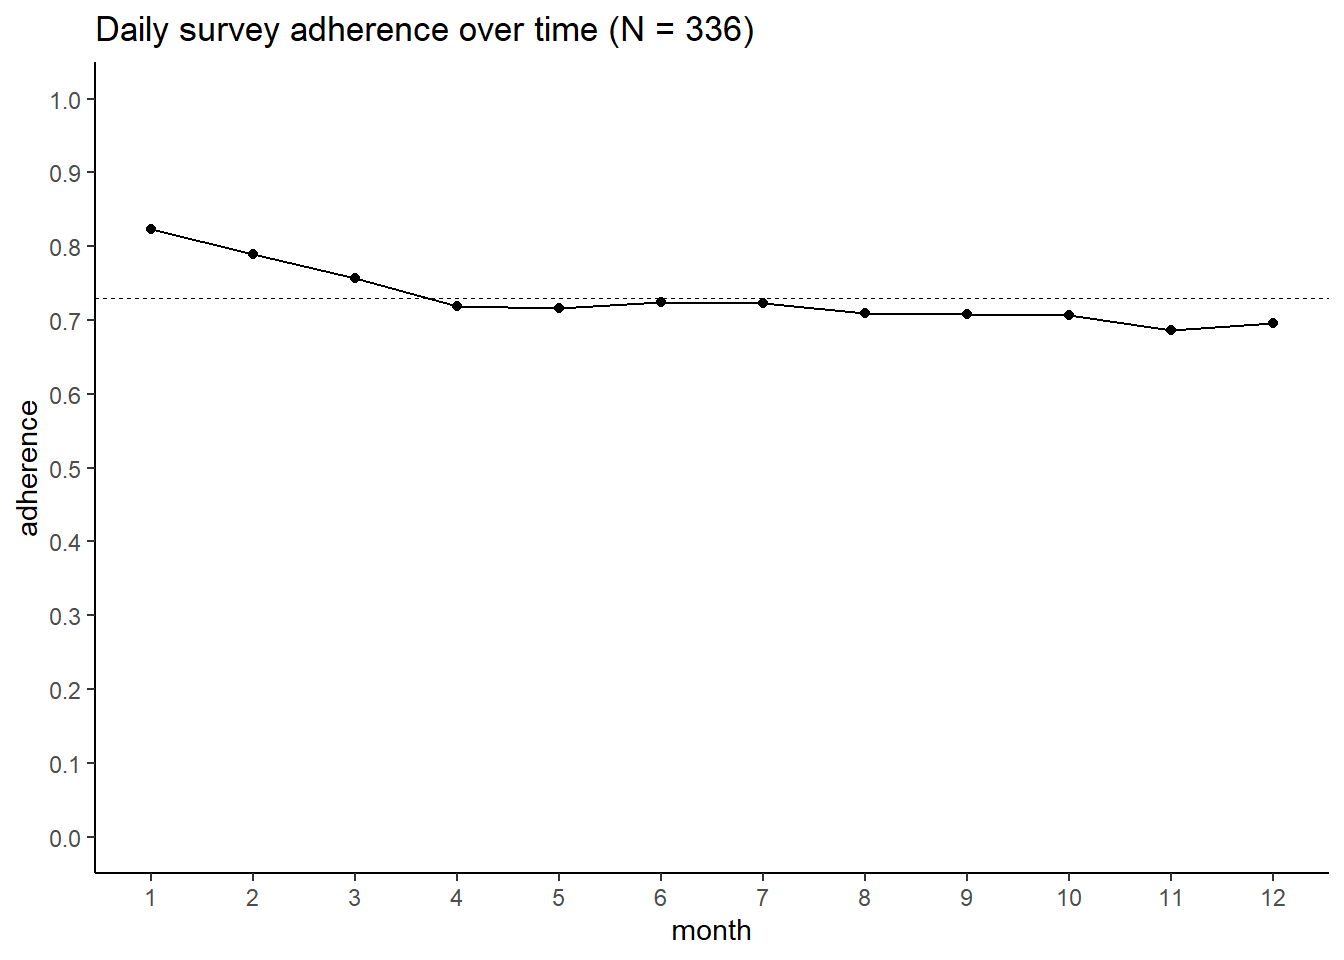

In [ ]:
#| code-fold: true

ema_month_adherence |> 
  group_by(month) |> 
  summarize(mean_adherence = mean(adherence)) |> 
  ggplot(aes(x = month, y = mean_adherence)) +
  geom_point() +
  geom_line() +
  theme_classic() +
  scale_x_continuous(name = "month", 
                     breaks = seq(1, 12, 1)) +
  scale_y_continuous(name = "adherence", 
                     breaks = seq(0, 1, .1), 
                     limits = c(0, 1)) +
  labs(title = "Daily survey adherence over time (N = 336) ") +
  theme(legend.title = element_blank()) +
  geom_hline(aes(yintercept = mean(mean_adherence)), linetype = "dashed", linewidth = .3)

### Monthly Survey Overall Adherence

Count how many months on study

In [ ]:
dates <- dates |> 
  mutate(study_months = floor(interval(study_start, study_end) / months(1)))

Count how many completed monthly surveys

In [ ]:
monthly_count <-  dates |> 
  left_join(monthly |> 
  group_by(subid) |> 
  summarize(n = n()), by = "subid") |> 
  mutate(n_prompts = study_months,
         n = if_else(n > n_prompts, n_prompts, n))

calculate mean adherence

In [ ]:
mean_monthly <- monthly_count |> 
  group_by(subid) |> 
  mutate(mean = n/n_prompts) |> 
  ungroup() |> 
  summarize(mean = mean(mean))

**On average participants’ (N = 336) overall adherence for the monthly survey was 96%.**

In [ ]:
monthly_count |> 
  group_by(subid) |> 
  mutate(mean = n/n_prompts,
         adher_90 = if_else(mean >= .9, 1, 0)) |> 
  ungroup() |> 
  count(adher_90)

# A tibble: 2 × 2
  adher_90     n
     <dbl> <int>
1        0    43
2        1   293

**88% of participants completed at least 90% of their monthly surveys.**

In [ ]:
monthly_count |> 
  group_by(subid) |> 
  mutate(mean = n/n_prompts,
         adher_80 = if_else(mean >= .8, 1, 0)) |> 
  ungroup() |> 
  count(adher_80)

# A tibble: 2 × 2
  adher_80     n
     <dbl> <int>
1        0    21
2        1   315

[1] 0.9404762

Hist of overall adherence by subid

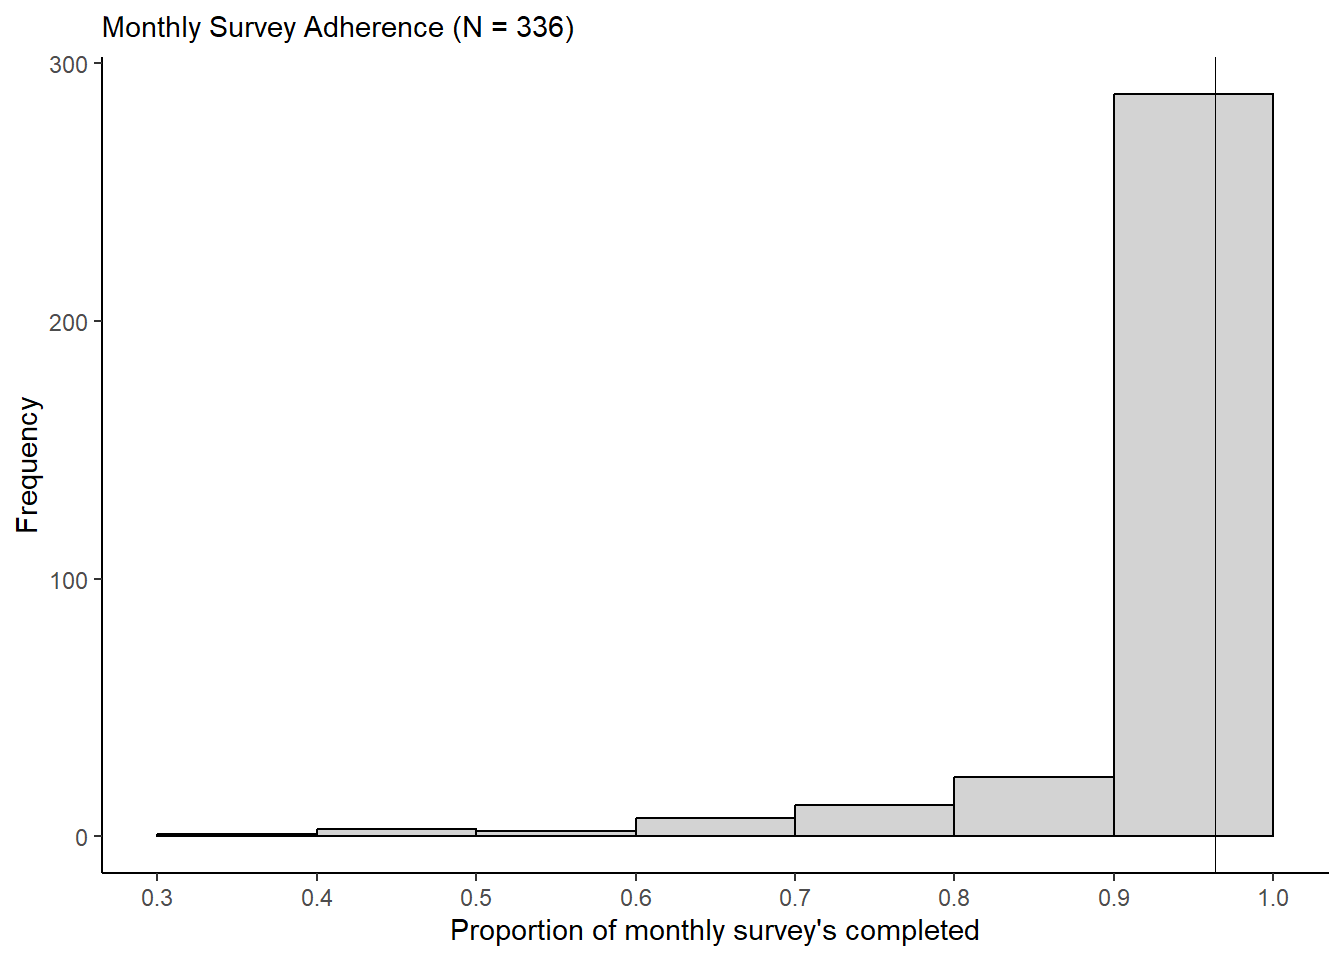

In [ ]:
#| code-fold: true

monthly_count |> 
  group_by(subid) |> 
  mutate(adherence = n/n_prompts) |> 
  ggplot(aes(x = adherence)) +
  geom_histogram(color = "black", fill = "light grey", binwidth = .1, center = .55) +
  scale_x_continuous(breaks = c(0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0)) +
  labs(y = "Frequency", x = "Proportion of monthly survey's completed",
       subtitle = "Monthly Survey Adherence (N = 336)") +
  geom_vline(aes(xintercept = mean_monthly$mean), linewidth = .3) +
  theme_classic()